# Week4 授業前課題１　アヤメの分類

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler #　標準化モジュール
from sklearn.model_selection import train_test_split # testとtrain分割
from sklearn.neighbors import KNeighborsClassifier # 最近傍法
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
#print(iris)

In [3]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
print(X.dtypes) # データのタイプを確認
X.head()

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# 目的変数(ラベル：target)をyに格納
y = pd.DataFrame({ "Species" : iris.target})
print(y.dtypes) # データのタイプを確認
y.head()

Species    int64
dtype: object


,Species
0,0
1,0
2,0
3,0
4,0


In [5]:
df = pd.concat([X, y], axis=1, sort=False)
df.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


## 【課題1】練習のために特徴量とカテゴリを選択

In [6]:
df['target'] = iris.target_names[iris.target]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,target
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [7]:
#virgicolor（Species=1)とvirginica(Species=2)データを取り出す

# virgicolorとvirginicaを取り出す
versicolor = df.query("target == 'versicolor'")
virginica = df.query("target == 'virginica'")

display(versicolor.head()) # 正常
display(virginica.head()) # 正常

# sepal_lengthとpetal_lengthを取り出す
sepal_length = pd.DataFrame(df["sepal length (cm)"])
petal_length = pd.DataFrame(df["petal length (cm)"])

display(sepal_length.head()) # 正常
display(petal_length.head()) # 正常


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,target
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,target
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


,sepal length (cm)
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


,petal length (cm)
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4


In [8]:
#virgicolor（Species=1)とvirginica(Species=2)データを取り出す

# virgicolorとvirginicaを取り出す(＝setosa以外)
versicolor_virginica = df.query("target != 'setosa'")
#display(versicolor_virginica) # 正常

# sepal_lengthとpetal_lengthとtarget列を取り出す
separate_data = versicolor_virginica.loc[:, ["sepal length (cm)", "petal length (cm)", "target"]]

display(separate_data.head())



,sepal length (cm),petal length (cm),target
50,7.0,4.7,versicolor
51,6.4,4.5,versicolor
52,6.9,4.9,versicolor
53,5.5,4.0,versicolor
54,6.5,4.6,versicolor


## 【問題2】データの分析

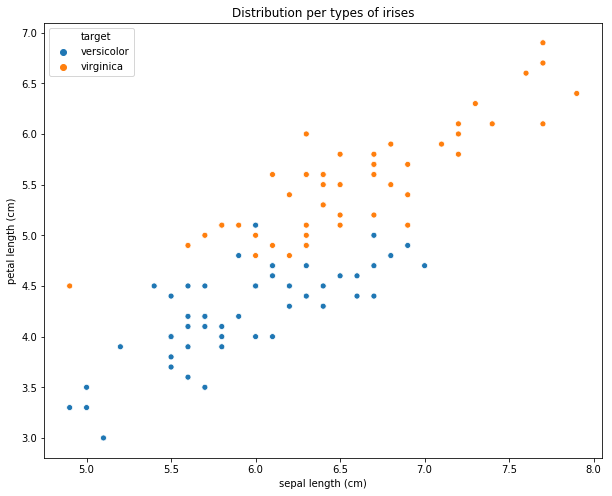

In [9]:
# 散布図

plt.figure(figsize=(10, 8))
plt.title("Distribution per types of irises")
sns.scatterplot(x="sepal length (cm)",
                y="petal length (cm)", hue="target", data=separate_data) 


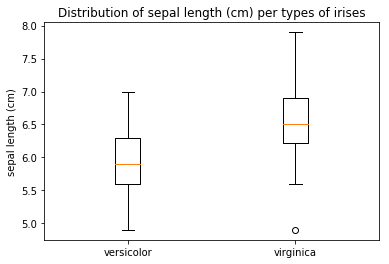

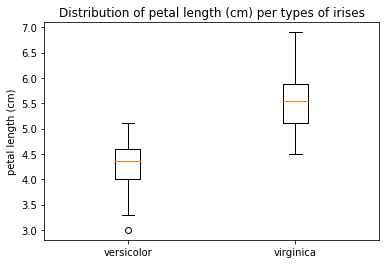

In [10]:
# 箱ひげ図

def plot_by_label(data=separate_data, target_colomn="target", label0="versicolor", label1="virginica", y_column="sepal length (cm)"):

    # ラベルの値のリストを取得
    label_names = data[target_colomn].unique()
    #print(label_Species)
    
    # virgicolorとvirginicaの行を取り出す
    label0 = data[data[target_colomn].isin([label0])]
    label1 = data[data[target_colomn].isin([label1])]

    # y軸にとるデータの列を取り出す
    data_label0 = label0[y_column]
    data_label1 = label1[y_column]

    # 箱ひげ図に描画
    plt.title("Distribution of " + y_column + " per types of irises")
    plt.ylabel(y_column)
    plt.boxplot([data_label0, data_label1], labels = label_names)
    plt.show()

# sepal lengthの箱ひげ図
plot_by_label()

# petal lengthの箱ひげ図
plot_by_label(y_column="petal length (cm)")



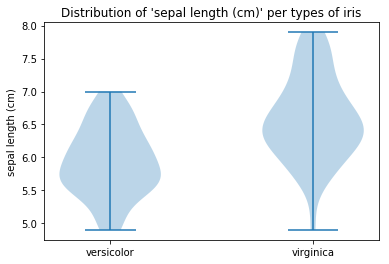

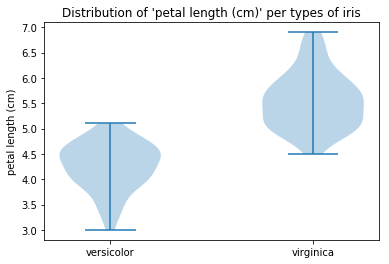

In [11]:
# バイオリン図

def violinplot_by_label(data=separate_data, target_colomn="target", label0="versicolor", label1="virginica", y_column="sepal length (cm)"):
    # X軸の値のリストを取得
    label_names = data[target_colomn].unique()
    #print(label_Species)

    # ラベル別に行を取り出す
    label0 = data[data[target_colomn].isin([label0])]
    label1 = data[data[target_colomn].isin([label1])]

    # y軸にとるデータの列を取り出す
    data_label0 = np.array(label0[y_column])
    data_label1 = np.array(label1[y_column])

    # バイオリン図に描画
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.title("Distribution of '" + y_column + "' per types of iris")
    ax.violinplot([data_label0, data_label1])
    ax.set_xticks([1, 2])
    ax.set_xticklabels(label_names)
    ax.set_ylabel(y_column)
    plt.show()

# sepal lengthのバイオリン図
violinplot_by_label()

# petal lengthのバイオリン図
violinplot_by_label(y_column="petal length (cm)")


## 【問題3】前処理・訓練用データと検証用データの分割

In [12]:
# 訓練用（train）データ75%、検証用（validation）データ25%に分割する。

# 特徴量データのtarget列を削除
versicolor_virginica_data = versicolor_virginica.loc[:, ["sepal length (cm)", "petal length (cm)"]]
#display(versicolor_virginica_data.head()) # 正常

# 目的変数データの0="setosa"を削除
y_versicolor_virginica= y[50:]

# 特徴量をX,目的変数をyのndarrayに格納
X_array = np.array(versicolor_virginica_data)
print("X_array\n{}".format(X_array[:4, :])) # 正常

y_array = np.array(y_versicolor_virginica)
print("y_array\n{}".format(y_array[:4]))
print(y_array.shape)
y_array = y_array.ravel() # 1次元配列に変換
print(y_array)

# データを訓練用と検証用に分割 
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.25,random_state=0)

print("X_train")
print(X_train.shape)
print(X_train[:4]) # 正常
print("X_test")
print(X_test.shape)
print(X_test[:4]) # 正常
print("y_train")
print(y_train.shape)
print(y_train) # 正常
print("y_test") 
print(y_test.shape)
print(y_test) # 正常


X_array
[[7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]]
y_array
[[1]
 [1]
 [1]
 [1]]
(100, 1)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
X_train
(75, 2)
[[5.1 3. ]
 [6.3 4.7]
 [5.9 5.1]
 [6.4 5.6]]
X_test
(25, 2)
[[6.8 4.8]
 [6.3 5.6]
 [6.9 4.9]
 [7.6 6.6]]
y_train
(75,)
[1 1 2 2 2 2 2 2 2 2 1 1 2 2 2 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1
 2 2 2 2 1 2 1 2 1 1 1 2 2 2 1 2 2 2 1 1 2 1 1 2 2 1 2 2 2 1 1 2 1 2 2 2 1
 1]
y_test
(25,)
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2 1 2 1]


## 【問題4】前処理・標準化

In [13]:
# 標準化を行う

In [14]:
# X_trainの標準化
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
print(X_train[:4, :]) # 正常

#　X_testの標準化
X_test = scaler.transform(X_test)
print(X_test) # 正常

#shapeを確認
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)


[[-1.77029021 -2.29778941]
 [ 0.03817879 -0.24187257]
 [-0.56464421  0.24187257]
 [ 0.18888454  0.84655399]]
[[ 7.91707539e-01 -1.20936285e-01]
 [ 3.81787899e-02  8.46553995e-01]
 [ 9.42413289e-01  2.14825997e-15]
 [ 1.99735354e+00  2.05591684e+00]
 [ 1.39453054e+00  1.33029913e+00]
 [ 7.91707539e-01  1.20936285e+00]
 [-1.01676146e+00 -4.83745140e-01]
 [ 3.81787899e-02  2.14825997e-15]
 [ 3.39590289e-01  1.08842656e+00]
 [ 6.41001789e-01  3.62808855e-01]
 [ 3.81787899e-02  8.46553995e-01]
 [-7.15349959e-01  2.41872570e-01]
 [ 1.88884540e-01  8.46553995e-01]
 [-2.63232710e-01 -2.41872570e-01]
 [-2.07170171e+00 -1.93498056e+00]
 [-1.16746721e+00 -1.33029913e+00]
 [ 3.81787899e-02  2.14825997e-15]
 [ 1.88884540e-01 -7.25617710e-01]
 [-4.13938459e-01  2.41872570e-01]
 [ 4.90296039e-01 -3.62808855e-01]
 [-1.92099596e+00 -1.93498056e+00]
 [ 7.91707539e-01  7.25617710e-01]
 [-1.16746721e+00 -1.08842656e+00]
 [-1.01676146e+00  2.14825997e-15]
 [-8.66055709e-01 -8.46553995e-01]]


## 【問題5】学習と推定

In [15]:
# 最近傍法

# predictメソッドに入力

# KNeighborsClassifier 予測　
# 5-nn
nn_5 = KNeighborsClassifier() # インスタンス生成
nn_5.fit(X_train, y_train) # モデル作成実行
y_pred_5 = nn_5.predict(X_test) # 検証データで予測
print("5-nnの予測\n{}".format(y_pred_5))

# 1-nn
nn_1 = KNeighborsClassifier(n_neighbors=1) # インスタンス生成
nn_1.fit(X_train, y_train) # モデル作成実行
y_pred_1 = nn_1.predict(X_test)
print("1-nnの予測\n{}".format(y_pred_1))

# 3-nn
nn_3 = KNeighborsClassifier(n_neighbors=3) # インスタンス生成
nn_3.fit(X_train, y_train) # モデル作成実行
y_pred_3 = nn_3.predict(X_test)
print("3-nnの予測\n{}".format(y_pred_3))

y_test



5-nnの予測
[1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 1 2 1 2 1 1 2 1 2 1]
1-nnの予測
[1 2 2 2 2 2 1 2 2 1 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
3-nnの予測
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]


array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1])

## 【問題6】評価

・scikit-learnを使い4種類の指標を計算する

In [16]:
# 正解率・正確さ(Accuracy)
from sklearn.metrics import accuracy_score
print("5-nnのAccuracy:{}".format(accuracy_score(y_test, y_pred_5)))
print("3-nnのAccuracy:{}".format(accuracy_score(y_test, y_pred_1)))
print("3-nnのAccuracy:{}".format(accuracy_score(y_test, y_pred_3)))

5-nnのAccuracy:0.88
3-nnのAccuracy:0.84
3-nnのAccuracy:0.92


In [17]:
# 精度・適合率(Precision)

print("5-nnのPrecision:{}".format(precision_score(y_test, y_pred_5)))
print("1-nnのPrecision:{}".format(precision_score(y_test, y_pred_1)))
print("3-nnのPrecision:{}".format(precision_score(y_test, y_pred_3)))

5-nnのPrecision:1.0
1-nnのPrecision:0.9090909090909091
3-nnのPrecision:1.0


In [18]:
# 再現率(Recall)
from sklearn.metrics import recall_score
print("5-nnのRecall:{}".format(recall_score(y_test, y_pred_5)))
print("1-nnのRecall:{}".format(recall_score(y_test, y_pred_1)))
print("3-nnのRecall:{}".format(recall_score(y_test, y_pred_3)))

5-nnのRecall:0.7692307692307693
1-nnのRecall:0.7692307692307693
3-nnのRecall:0.8461538461538461


In [19]:
# f値

from sklearn.metrics import f1_score
print("5-nnのf値:{}".format(f1_score(y_test, y_pred_5)))
print("1-nnのf値:{}".format(f1_score(y_test, y_pred_1)))
print("3-nnのf値:{}".format(f1_score(y_test, y_pred_3)))

5-nnのf値:0.8695652173913044
1-nnのf値:0.8333333333333333
3-nnのf値:0.9166666666666666


In [20]:
# 適合率(Precision)、再現率(Recall)、F1値をまとめて算出
from sklearn.metrics import classification_report
import pprint

print(classification_report(y_test, y_pred_5))
print(classification_report(y_test, y_pred_1))
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           1       1.00      0.77      0.87        13
           2       0.80      1.00      0.89        12

   micro avg       0.88      0.88      0.88        25
   macro avg       0.90      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25

              precision    recall  f1-score   support

           1       0.91      0.77      0.83        13
           2       0.79      0.92      0.85        12

   micro avg       0.84      0.84      0.84        25
   macro avg       0.85      0.84      0.84        25
weighted avg       0.85      0.84      0.84        25

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        13
           2       0.86      1.00      0.92        12

   micro avg       0.92      0.92      0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



・混合行列をscikit-learnを使い表示する

In [21]:
from sklearn.metrics import confusion_matrix

cm_5 = confusion_matrix(y_test, y_pred_5)
print(cm_5)

cm_1 = confusion_matrix(y_test, y_pred_1)
print(cm_1)

cm_3 = confusion_matrix(y_test, y_pred_3)
print(cm_3)

[[10  3]
 [ 0 12]]
[[10  3]
 [ 1 11]]
[[11  2]
 [ 0 12]]


・4種類の指標値の意味について簡単に調査して文章でまとめる

## 【問題7】可視化

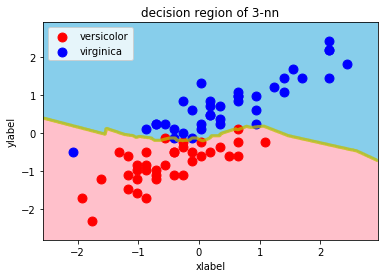

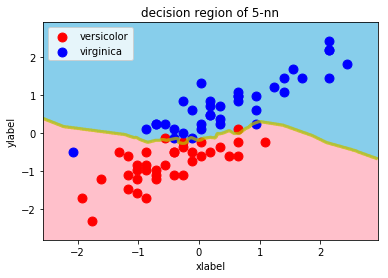

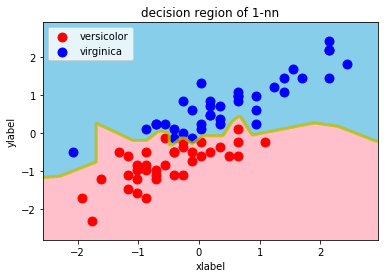

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

# 3-nnの決定領域を表示
decision_region(X=X_train, y=y_train, model=nn_3, title='decision region of 3-nn')

# 5-nnの決定領域を表示
decision_region(X=X_train, y=y_train, model=nn_5, title='decision region of 5-nn')

# 5-nnの決定領域を表示
decision_region(X=X_train, y=y_train, model=nn_1, title='decision region of 1-nn')

## 【問題8】他の手法の学習

In [23]:
# 最近傍法の指標値

# accuracy(全て5-nn)
knn_accuracy = accuracy_score(y_test, y_pred_5)
print(knn_accuracy)

# precision
knn_precision = precision_score(y_test, y_pred_5)
print(knn_precision)

# recall
knn_recall = recall_score(y_test, y_pred_5)
print(knn_recall)

# f値
knn_f1 = f1_score(y_test, y_pred_5)
print(knn_f1)

0.88
1.0
0.7692307692307693
0.8695652173913044


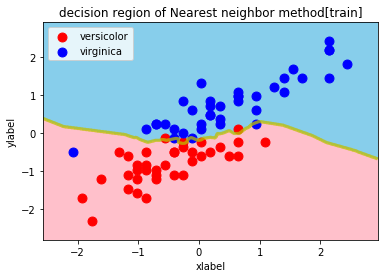

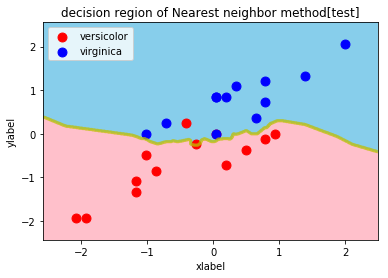

In [24]:
# 最近傍法の可視化（訓練データをプロット）

decision_region(X=X_train, y=y_train, model=nn_5, title='decision region of Nearest neighbor method[train]')

# 最近傍法の可視化（検証データをプロット）
decision_region(X=X_test, y=y_test, model=nn_5, title='decision region of Nearest neighbor method[test]')

In [25]:
# ロジスティック回帰
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# 学習
logi = LogisticRegression(random_state=0, solver='lbfgs', 
                         multi_class='multinomial').fit(X_train, y_train)

# 推定
logi_pred = logi.predict(X_test)
print("推定\n{}".format(logi_pred))


推定
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]


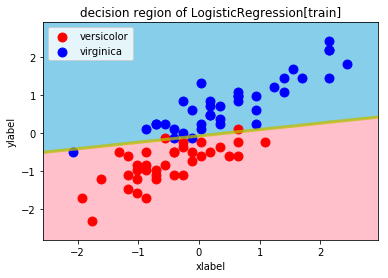

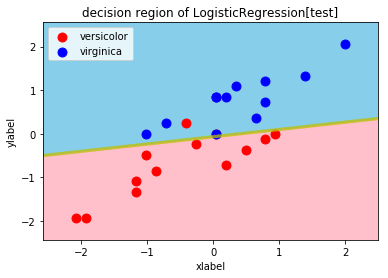

In [26]:
# ロジスティック回帰の可視化（訓練データをプロット）

decision_region(X=X_train, y=y_train, model=logi, title='decision region of LogisticRegression[train]')

# ロジスティック回帰の可視化（検証データをプロット）
decision_region(X=X_test, y=y_test, model=logi, title='decision region of LogisticRegression[test]')


In [27]:
# ロジスティック回帰評価
# accuracy(全てデフォルト値)
logi_accuracy = accuracy_score(y_test, logi_pred)
print(logi_accuracy)

# precision
logi_precision = precision_score(y_test, logi_pred)
print(logi_precision)

# recall
logi_recall = recall_score(y_test, logi_pred)
print(logi_recall)

# f値
logi_f1 = f1_score(y_test, logi_pred)
print(logi_f1)

0.92
1.0
0.8461538461538461
0.9166666666666666


In [28]:
# SVM
from sklearn.svm import SVC

# 学習
svm = SVC(gamma='auto')
svm.fit(X_test, y_test) 
SVC()

# 推定
svm_pred = svm.predict(X_test)

print("推定\n{}".format(svm_pred))


推定
[1 2 1 2 2 2 1 1 2 2 2 2 2 1 1 1 1 1 2 1 1 2 1 1 1]


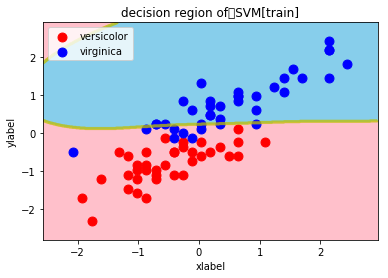

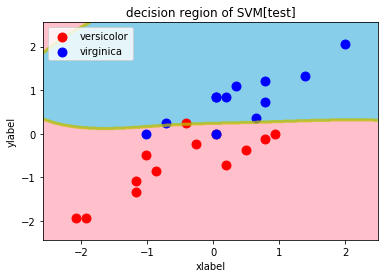

In [29]:
# SVMの可視化(訓練データをプロット)

decision_region(X=X_train, y=y_train, model=svm, title='decision region of　SVM[train]')

# SVMの可視化（検証データをプロット）
decision_region(X=X_test, y=y_test, model=svm, title='decision region of SVM[test]')


In [30]:
# SVM評価
# accuracy(全てデフォルト値)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(svm_accuracy)

# precision
svm_precision = precision_score(y_test, svm_pred)
print(svm_precision)

# recall
svm_recall = recall_score(y_test, svm_pred)
print(svm_recall)

# f値
svm_f1 = f1_score(y_test, svm_pred)
print(svm_f1)

0.88
0.8571428571428571
0.9230769230769231
0.888888888888889


In [31]:
# 決定木
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
cross_val_score(tree, X_train, y_train, cv=10)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
print("推定\n{}".format(tree_pred))

推定
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 2 1 1 2 1 2 1]


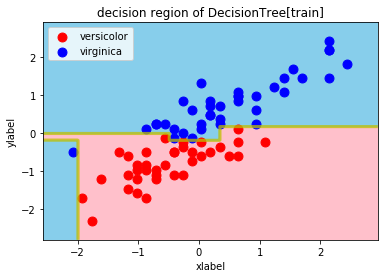

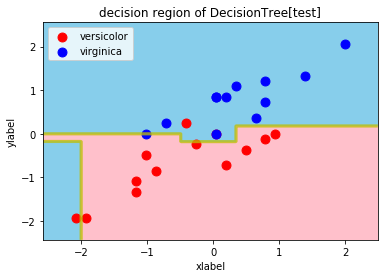

In [32]:
# 決定木の可視化(訓練データをプロット)

decision_region(X=X_train, y=y_train, model=tree, title='decision region of DecisionTree[train]')

# 決定木の可視化（検証データをプロット）
decision_region(X=X_test, y=y_test, model=tree, title='decision region of DecisionTree[test]')


In [33]:
# 決定木評価
# accuracy(全てデフォルト値)
tree_accuracy = accuracy_score(y_test, tree_pred)
print(tree_accuracy)

# precision
tree_precision = precision_score(y_test, tree_pred)
print(tree_precision)

# recall
tree_recall = recall_score(y_test, tree_pred)
print(tree_recall)

# f値
tree_f1 = f1_score(y_test, tree_pred)
print(tree_f1)

0.88
1.0
0.7692307692307693
0.8695652173913044


In [34]:
# ランダムフォレスト

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# 学習
forest = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
forest.fit(X_test, y_test)

# 推定
forest_pred = forest.predict(X_test)
print("推定\n{}".format(forest_pred))


推定
[1 2 1 2 2 2 1 1 2 2 2 2 2 1 1 1 1 1 2 1 1 2 1 1 1]


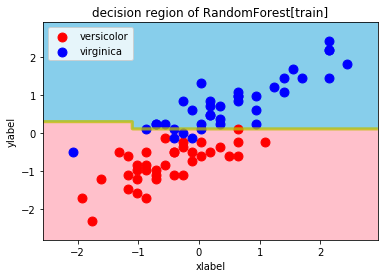

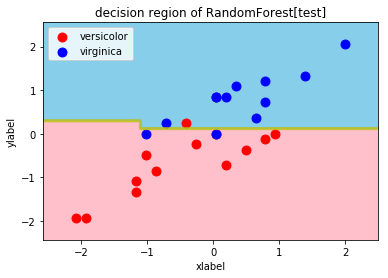

In [35]:
# ランダムフォレストの可視化（訓練データをプロット）

decision_region(X=X_train, y=y_train, model=forest, title='decision region of RandomForest[train]')

# ランダムフォレストの可視化（検証データをプロット）

decision_region(X=X_test, y=y_test, model=forest, title='decision region of RandomForest[test]')



In [36]:
# ランダムフォレスト評価
# accuracy(全てデフォルト値)
forest_accuracy = accuracy_score(y_test, forest_pred)
print(forest_accuracy)

# precision
forest_precision = precision_score(y_test, forest_pred)
print(forest_precision)

# recall
forest_recall = recall_score(y_test, forest_pred)
print(forest_recall)

# f値
forest_f1 = f1_score(y_test, forest_pred)
print(forest_f1)

0.88
0.8571428571428571
0.9230769230769231
0.888888888888889


指標値を１つの表にまとめ、表と決定領域を利用して結果の考察
どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

In [37]:
# 指標値の表を作る

# 縦軸に手法、横軸に指標値を置く
index_name = ["最近傍法", "ロジスティック回帰", "SVM", "決定木", "ランダムフォレスト"]
columns_name = ["accuracy", "precision", "recall", "f値"]

#　手法ごとの評価値リストを作る
knn_evaluation = [knn_accuracy, knn_precision, knn_recall, knn_f1]
logi_evaluation = [logi_accuracy, logi_precision, logi_recall, logi_f1]
svm_evaluation = [svm_accuracy, svm_precision, svm_recall, svm_f1]
tree_evaluation = [tree_accuracy, tree_precision, tree_recall, tree_f1]
forest_evaluation = [forest_accuracy, forest_precision, forest_recall, forest_f1]

method_evaluation = [knn_evaluation, logi_evaluation, svm_evaluation, tree_evaluation, forest_evaluation]

Index_value = pd.DataFrame(method_evaluation, index=index_name, columns=columns_name)
Index_value

,accuracy,precision,recall,f値
最近傍法,0.88,1.000000,0.769231,0.869565
ロジスティック回帰,0.92,1.000000,0.846154,0.916667
SVM,0.88,0.857143,0.923077,0.888889
決定木,0.88,1.000000,0.769231,0.869565
ランダムフォレスト,0.88,0.857143,0.923077,0.888889


#### 考察：
ロジスティック回帰が、正解率（accuracy）、適合率（precision）、f値の３つの指標において最も精度が高かった。再現率（recall）については、SVMが最も高い精度だった。
決定領域は、最近傍法は緩やかな山形、ロジスティック回帰は右上がりの直線、SVMは曲線、決定木は凹凸のある直線、ランダムフォレストは階段状の決定境界を描いた。